In [1]:
import pandas as pd
import geopandas

## Import zipcodes shapefile

This will tell plotting software how to map our data.

In [85]:
zips_gdf = geopandas.read_file("cb_2019_us_zcta510_500k/cb_2019_us_zcta510_500k.shp", dtype={"ZCTA5CE10": object})

In [86]:
zips_gdf.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,geometry
0,35586,8600000US35586,35586,472581657,892816,"MULTIPOLYGON (((-88.00160 33.81101, -88.00258 ..."
1,72454,8600000US72454,72454,263532032,775633,"POLYGON ((-90.41711 36.36553, -90.41686 36.390..."
2,71653,8600000US71653,71653,817752215,89308151,"POLYGON ((-91.45936 33.30273, -91.45758 33.381..."
3,19963,8600000US19963,19963,276290156,21123546,"POLYGON ((-75.50557 38.92751, -75.50313 38.927..."
4,81303,8600000US81303,81303,557450510,6445737,"POLYGON ((-108.04031 37.09764, -108.03896 37.1..."


Making sure the zipcodes are unique (if there are duplicates, `freq` below will be more than 1).

In [87]:
zips_gdf.ZCTA5CE10.describe()

count     33144
unique    33144
top       35586
freq          1
Name: ZCTA5CE10, dtype: object

## Importing ACS data

This has data about income, aggregated to the zipcode level by the Census Bureau.

In [58]:
acs2019 = pd.read_csv("ACS 2019_income_data_zip_accessible.csv", dtype={'ZIP': object}) #enforce same data type as shapefile

Making sure the row counts (`count`) haven't changed since we wrote the file.

In [59]:
acs2019.describe()

,Estimate - Total:,Margin of Error - Total:,"Estimate - Total: - Less than $10,000","Margin of Error - Total: - Less than $10,000","Estimate - Total: - $10,000 to $14,999","Margin of Error - Total: - $10,000 to $14,999","Estimate - Total: - $15,000 to $19,999","Margin of Error - Total: - $15,000 to $19,999","Estimate - Total: - $20,000 to $24,999","Margin of Error - Total: - $20,000 to $24,999",...,"Estimate - Total: - $75,000 to $99,999","Margin of Error - Total: - $75,000 to $99,999","Estimate - Total: - $100,000 to $124,999","Margin of Error - Total: - $100,000 to $124,999","Estimate - Total: - $125,000 to $149,999","Margin of Error - Total: - $125,000 to $149,999","Estimate - Total: - $150,000 to $199,999","Margin of Error - Total: - $150,000 to $199,999","Estimate - Total: - $200,000 or more","Margin of Error - Total: - $200,000 or more"
count,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.00000,...,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000
mean,3681.948762,172.515821,230.234903,72.567271,160.920380,61.663527,163.747675,62.879921,167.707095,64.01724,...,465.690791,100.374215,333.357790,83.230223,219.777597,66.111383,247.101238,66.120109,280.055707,61.944988
std,5321.903126,143.212556,441.473859,79.544948,276.897093,65.138610,265.203290,65.411637,264.049591,66.30236,...,696.960873,100.803795,525.237174,87.068286,372.873903,72.323300,469.374301,76.513155,684.816325,77.602558
min,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,2.00000,...,0.000000,1.000000,0.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000
25%,271.000000,60.000000,11.000000,13.000000,9.000000,12.000000,10.000000,12.000000,11.000000,12.00000,...,31.000000,22.000000,17.000000,15.000000,8.000000,12.000000,6.000000,12.000000,3.000000,12.000000
50%,1073.000000,125.000000,55.000000,39.000000,45.000000,33.000000,48.000000,35.000000,49.000000,36.00000,...,137.000000,59.000000,87.000000,46.000000,47.000000,33.000000,40.000000,31.000000,29.000000,25.000000
75%,5061.000000,257.000000,257.000000,109.000000,188.000000,94.000000,200.000000,96.000000,210.000000,98.00000,...,611.000000,156.000000,418.000000,130.000000,257.000000,101.000000,254.000000,99.000000,202.000000,87.000000
max,41355.000000,1092.000000,7901.000000,663.000000,3942.000000,477.000000,3126.000000,481.000000,3363.000000,465.00000,...,6491.000000,878.000000,5660.000000,860.000000,4105.000000,688.000000,6095.000000,836.000000,11968.000000,927.000000


## Merging ACS and shape data

In [88]:
merged = pd.merge(zips_gdf, acs2019, left_on="ZCTA5CE10", right_on="ZIP", how="outer")

Some quick data quality checks:

* Are there any mismatches between the datasets?
* Why does the shapefile have ~500 more rows than ACS?

In [90]:
merged[((pd.isna(merged["ZIP"])) & ~(pd.isna(merged["ZCTA5CE10"])))][["ZCTA5CE10", "ZIP", "Estimate - Total:"]].sort_values("ZCTA5CE10")

,ZCTA5CE10,ZIP,Estimate - Total:
26375,00801,NaN,NaN
797,00802,NaN,NaN
8507,00820,NaN,NaN
10012,00823,NaN,NaN
4947,00824,NaN,NaN
1556,00830,NaN,NaN
8387,00831,NaN,NaN
29337,00840,NaN,NaN
29220,00841,NaN,NaN
2168,00850,NaN,NaN


In [91]:
merged[(~(pd.isna(merged["ZIP"])) & (pd.isna(merged["ZCTA5CE10"])))][["ZCTA5CE10", "ZIP", "Estimate - Total:"]].sort_values("ZIP")

,ZCTA5CE10,ZIP,Estimate - Total:


In [76]:
zips_gdf[zips_gdf.ZCTA5CE20.str.startswith("010")]

,ZCTA5CE20,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
16362,01036,01036,B5,G6350,S,50791584,77618,+42.0711876,-072.4177176,"POLYGON ((-72.46994 42.08476, -72.46591 42.085..."
16363,01071,01071,B5,G6350,S,40656364,651235,+42.1600642,-072.8738401,"POLYGON ((-72.89566 42.12392, -72.89533 42.125..."
16365,01030,01030,B5,G6350,S,31155981,495757,+42.0729247,-072.6869715,"POLYGON ((-72.71456 42.03691, -72.71425 42.037..."
20460,01068,01068,B5,G6350,S,56254821,1033076,+42.3538870,-072.0606845,"POLYGON ((-72.11247 42.35642, -72.10965 42.358..."
20461,01082,01082,B5,G6350,S,121750768,19756886,+42.2997486,-072.2791638,"POLYGON ((-72.35602 42.30328, -72.35595 42.303..."
...,...,...,...,...,...,...,...,...,...,...
21155,01077,01077,B5,G6350,S,79912788,2151144,+42.0525703,-072.7773529,"POLYGON ((-72.83882 42.06946, -72.83573 42.074..."
21156,01056,01056,B5,G6350,S,70436242,2958247,+42.1835768,-072.4578116,"POLYGON ((-72.52420 42.21875, -72.52317 42.218..."
21192,01073,01073,B5,G6350,S,72908579,2082889,+42.2269485,-072.7415876,"POLYGON ((-72.81440 42.25682, -72.81428 42.256..."
21193,01075,01075,B5,G6350,S,45899614,1865237,+42.2565324,-072.5802475,"POLYGON ((-72.62411 42.23507, -72.62403 42.235..."


## Calculations

Creating a column with count of households making under $60,000 and households under $60,000 per capita.

In [34]:
merged["total_VITA_eligible"] = merged["Estimate - Total: - $10,000 to $14,999"] + \
                                merged["Estimate - Total: - $15,000 to $19,999"] + \
                                merged["Estimate - Total: - $20,000 to $24,999"] + \
                                merged["Estimate - Total: - $25,000 to $29,999"] + \
                                merged["Estimate - Total: - $30,000 to $34,999"] + \
                                merged["Estimate - Total: - $35,000 to $39,999"] + \
                                merged["Estimate - Total: - $40,000 to $44,999"] + \
                                merged["Estimate - Total: - $45,000 to $49,999"] + \
                                merged["Estimate - Total: - $50,000 to $59,999"] + \
                                merged["Estimate - Total: - Less than $10,000"]

In [41]:
merged["VITA_eligible_per_capita"] = merged["total_VITA_eligible"]/merged["Estimate - Total:"]

## Plotting

Some quick plots to make sure merging happened correctly.

In [26]:
import matplotlib

In [42]:
merged["total_VITA_eligible"].describe()

count    32923.000000
mean      1791.465936
std       2697.021961
min          0.000000
25%        149.000000
50%        549.000000
75%       2303.000000
max      25622.000000
Name: total_VITA_eligible, dtype: float64

In [43]:
merged["VITA_eligible_per_capita"].describe()

count    32402.000000
mean         0.530022
std          0.178659
min          0.000000
25%          0.415585
50%          0.538462
75%          0.645857
max          1.000000
Name: VITA_eligible_per_capita, dtype: float64

In [50]:
merged[(~(pd.isna(merged["total_VITA_eligible"])) & (pd.isna(merged["VITA_eligible_per_capita"])))][["ZCTA5CE20", "ZIP", "total_VITA_eligible", "VITA_eligible_per_capita", "Estimate - Total:"]].describe()

,total_VITA_eligible,VITA_eligible_per_capita,Estimate - Total:
count,521.0,0.0,521.0
mean,0.0,NaN,0.0
std,0.0,NaN,0.0
min,0.0,NaN,0.0
25%,0.0,NaN,0.0
50%,0.0,NaN,0.0
75%,0.0,NaN,0.0
max,0.0,NaN,0.0


<AxesSubplot:>

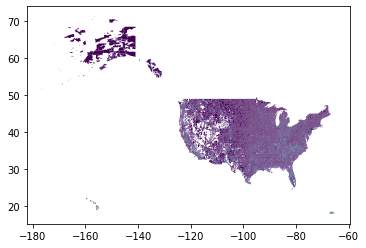

In [40]:
merged.plot(column="total_VITA_eligible")